# Análise exploratória de dados

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

sns.set_style('darkgrid')

## 1. Descrição dos dados

In [12]:
tips = pd.read_csv('../data/raw/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
dictionary = pd.read_csv('../data/external/data-dict.csv')
dictionary

,variavel,descricao,tipo,subtipo
0,total_bill,Valor total da conta (em dólares),quantitativa,contínua
1,tip,Valor da gorjeta (em dólares),quantitativa,contínua
2,sex,Sexo da pessoa que pagou a conta,qualitativa,nominal
3,smoker,Indica se havia fumantes no grupo,qualitativa,nominal
4,day,Dia da semana em que a refeição foi consumida,qualitativa,nominal
5,time,Momento do dia em que a refeição foi consumida,qualitativa,nominal
6,size,Número de pessoas no grupo,quantitativa,discreta


## 2. Perguntas de partida e hipóteses

 ### Perguntas de partida
 - O valor da gorjeta é proporcional ao valor da conta?
 - Qual é a distribuição dos valores de gorjeta?
 - Qual é a distribuição dos valores da conta?   
 - Ter um fumante no grupo muda no valor da gorjeta ou conta?
 - Quais dias tiveram mais pessoas?
 - Quais refeições tiveram mais pessoas?
 - Qual média de gorjeta ou conta por dia? E por refeição?
 - A hora impacta no valor da gorjeta?
 - A quantidade de pessoas no grupo impacta no valor da gorjeta?
 - Qual é a correlação entre o valor total da conta e a gorjeta em diferentes dias da semana?
 - Qual é a proporção média da gorjeta em relação ao valor total da conta?
 - Existe uma diferença significativa no valor da gorjeta entre homens e mulheres?


 
 ### Hipóteses
 
 - A quantidade de pessoas interfere no valor da conta e da gorjeta
 - Os finais de semana juntam mais pessoas 
 

## 3. Insights

### Qual é a distribuição dos valores de gorjeta?

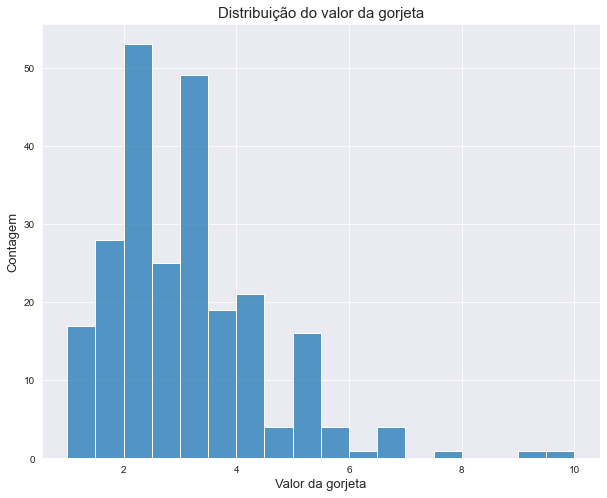

In [144]:
plt.figure(figsize=(10,8))
sns.histplot(data=tips, x= 'tip')

plt.title('Distribuição do valor da gorjeta', fontsize=15)
plt.xlabel('Valor da gorjeta', fontsize=13)
plt.ylabel('Contagem', fontsize=13)

plt.show()

### Qual é a distribuição dos valores da conta?

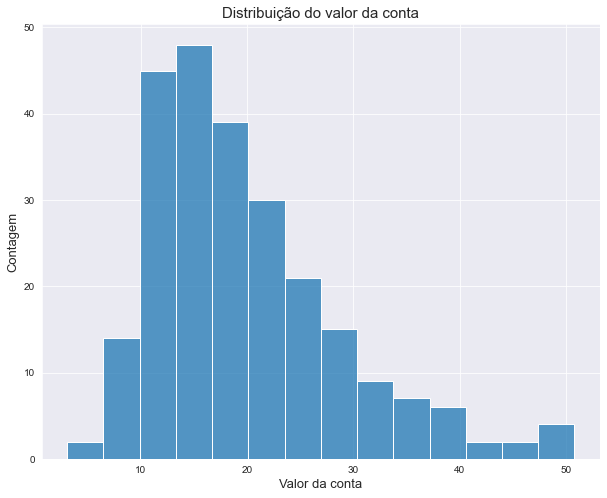

In [145]:
plt.figure(figsize=(10,8))
sns.histplot(data=tips, x= 'total_bill')

plt.title('Distribuição do valor da conta', fontsize=15)
plt.xlabel('Valor da conta', fontsize=13)
plt.ylabel('Contagem', fontsize=13)

plt.show()

### O valor da gorjeta é proporcional ao valor da conta?

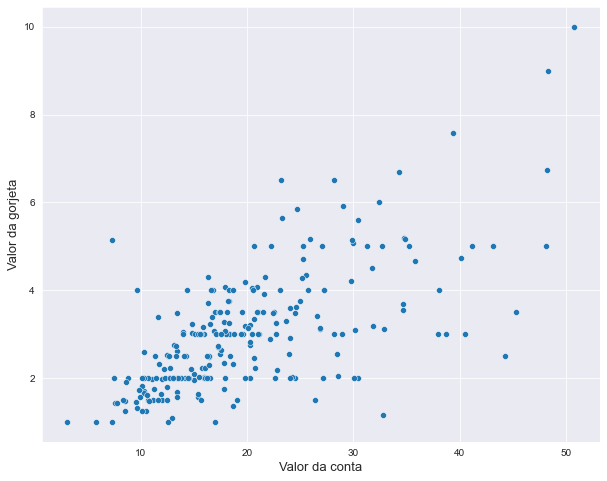

In [83]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=tips, x = 'total_bill', y = 'tip')

plt.xlabel('Valor da conta', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

plt.show()

### Ter um fumante no grupo muda no valor da gorjeta ou conta?

In [125]:
tips.groupby('smoker')['tip'].mean()

smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64

In [126]:
tips.groupby('smoker')['total_bill'].mean()

smoker
No     19.188278
Yes    20.756344
Name: total_bill, dtype: float64

### Quais dias tiveram mais pessoas?

In [119]:
day_size = tips.groupby('day')['size'].sum().reset_index()

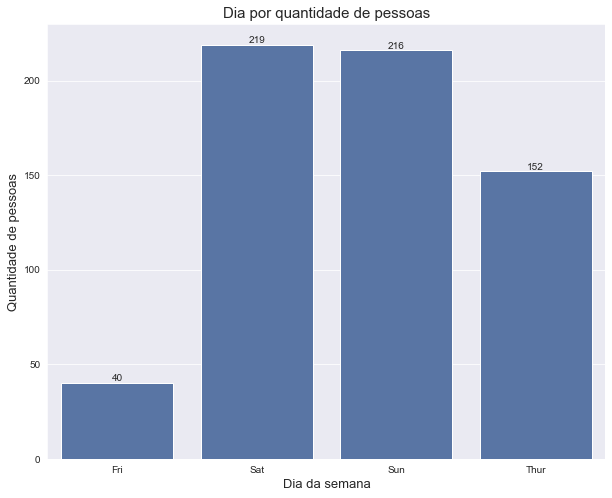

In [121]:

plt.figure(figsize=(10,8))
ax = sns.barplot(data=day_size, x = 'day', y = 'size', color='#4c72b0')

ax.bar_label(ax.containers[0])


plt.title('Dia por quantidade de pessoas', fontsize=15)
plt.xlabel('Dia da semana', fontsize=13)
plt.ylabel('Quantidade de pessoas', fontsize=13)

plt.show()

### Quais refeições tiveram mais pessoas?

In [122]:
time_size = tips.groupby('time')['size'].sum().reset_index()

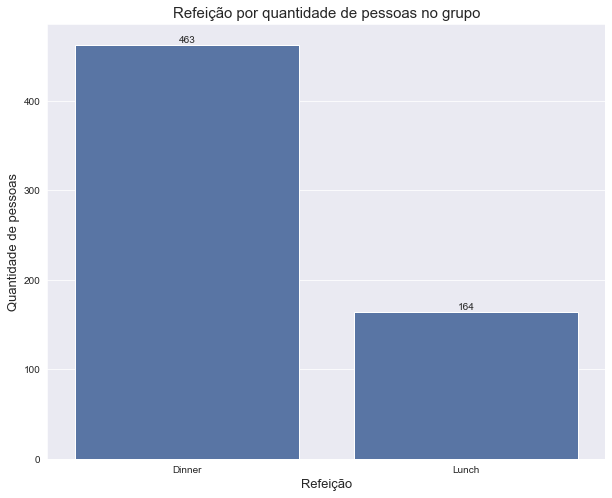

In [124]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=time_size, x = 'time', y = 'size', color='#4c72b0')

ax.bar_label(ax.containers[0])


plt.title('Refeição por quantidade de pessoas no grupo', fontsize=15)
plt.xlabel('Refeição', fontsize=13)
plt.ylabel('Quantidade de pessoas', fontsize=13)

plt.show()

### Qual média de gorjeta/conta por dia? E por refeição?

In [96]:
day_tip = tips.groupby('day')['tip'].mean().reset_index()

Text(0, 0.5, 'Valor da gorjeta')

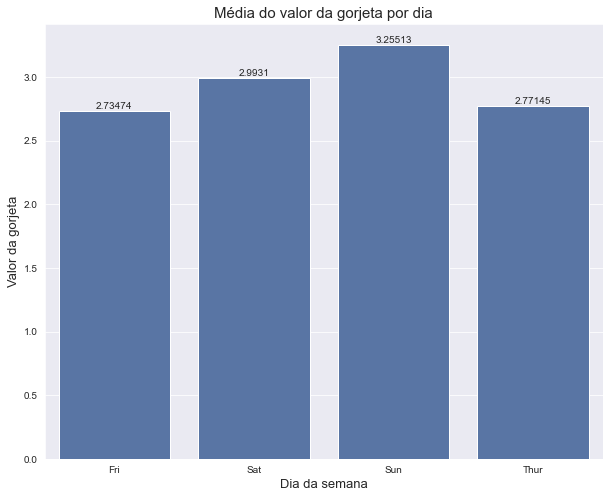

In [109]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=day_tip, x = 'day', y = 'tip', color='#4c72b0')

ax.bar_label(ax.containers[0])

plt.title('Média do valor da gorjeta por dia', fontsize=15)
plt.xlabel('Dia da semana', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

In [99]:
day_bill = tips.groupby('day')['total_bill'].mean().reset_index()

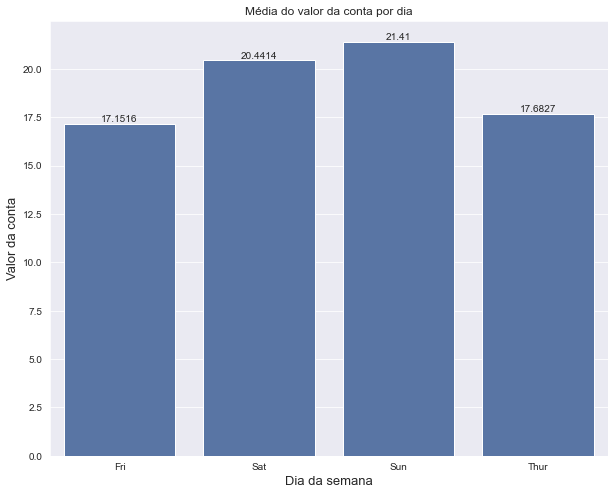

In [107]:
plt.figure(figsize=(10,8))
ax = sns.barplot(data=day_bill, x = 'day', y = 'total_bill', color='#4c72b0')

ax.bar_label(ax.containers[0])

plt.title('Média do valor da conta por dia')

plt.xlabel('Dia da semana', fontsize=13)
plt.ylabel('Valor da conta', fontsize=13)

plt.show()

### A refeição impacta no valor da gorjeta?

Text(0, 0.5, 'Valor da gorjeta')

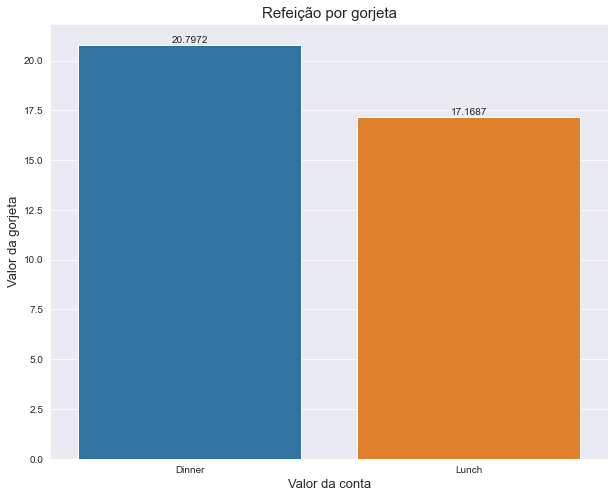

In [110]:
time_bill = tips.groupby('time')['total_bill'].mean().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot(data=time_bill, x = 'time', y = 'total_bill')

ax.bar_label(ax.containers[0])

plt.title('Refeição por gorjeta', fontsize=15)
plt.xlabel('Valor da conta', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

### A quantidade de pessoas no grupo impacta no valor da gorjeta?

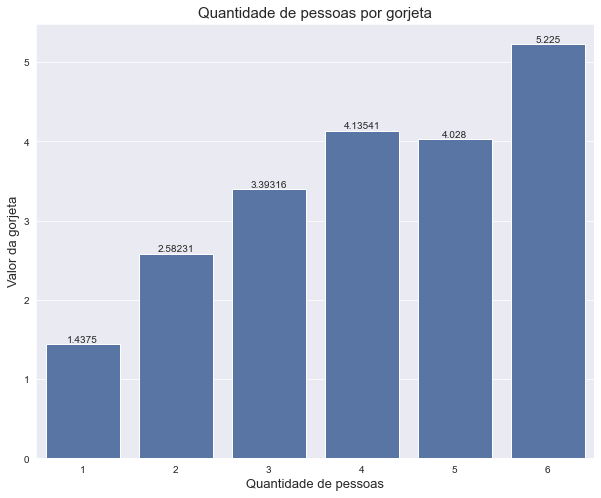

In [113]:
size_tip = tips.groupby('size')['tip'].mean().reset_index()

plt.figure(figsize=(10,8))
ax = sns.barplot(data=size_tip, x = 'size', y = 'tip', color='#4c72b0')

ax.bar_label(ax.containers[0])


plt.title('Quantidade de pessoas por gorjeta', fontsize=15)
plt.xlabel('Quantidade de pessoas', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

plt.show()

### Qual é a correlação entre o valor total da conta e a gorjeta em diferentes dias da semana?



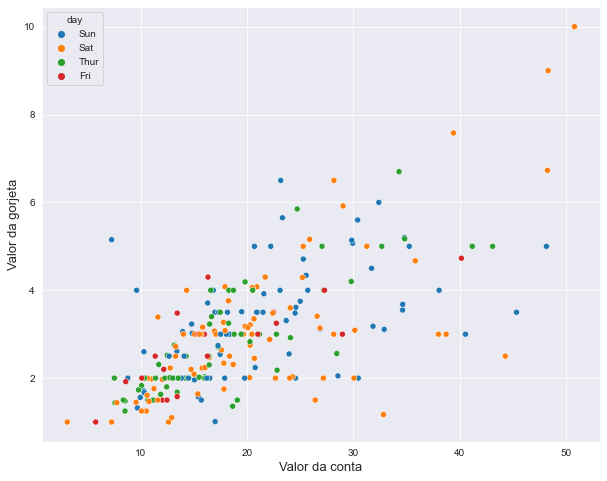

In [127]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=tips, x = 'total_bill', y = 'tip', hue = 'day')

plt.xlabel('Valor da conta', fontsize=13)
plt.ylabel('Valor da gorjeta', fontsize=13)

plt.show()

### Qual é a proporção média da gorjeta em relação ao valor total da conta?

In [146]:
proporcao = (tips['tip']/tips['total_bill'])*100
proporcao.mean()

16.080258172250463

### Existe uma diferença significativa no valor da gorjeta entre homens e mulheres?


In [151]:
tips.groupby('sex')['tip'].mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64